C:\Users\BRUNO\Desktop\TCC\AMANDA\setup.py:214: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  dataValues = pd.DataFrame.as_matrix(dataValues)


Four Classes Expanding and One Class Fixed. Bidimensional.
100 batches of 1645 instances



METHOD: Static lp as classifier
Execution time:  4.385862
Average error: 1.9769999999999897
Average macro-F1: 0.9796246598236599
Average micro-F1: 0.9807000000000001
Average Accuracy:  98.02300000000001
Standard Deviation:  0.417287670558333
Variance:  0.17412899999999984


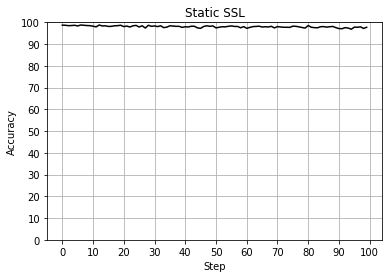

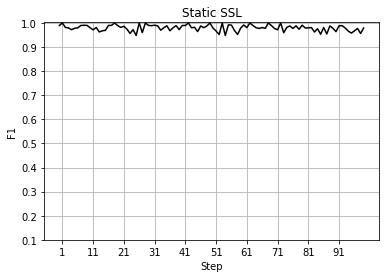

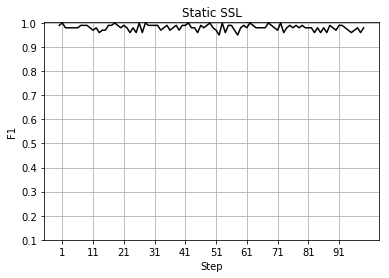




METHOD: Sliding lp as classifier
Execution time:  3.8938094999999997
Average error: 1.891900000000021
Average macro-F1: 0.979040415041858
Average micro-F1: 0.9794999999999999
Average Accuracy:  98.10809999999998
Standard Deviation:  0.43332134727012905
Variance:  0.18776738999999978


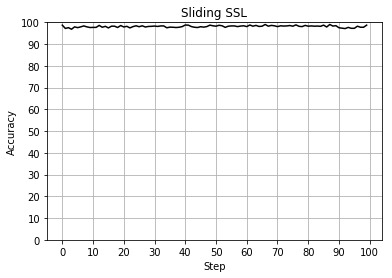

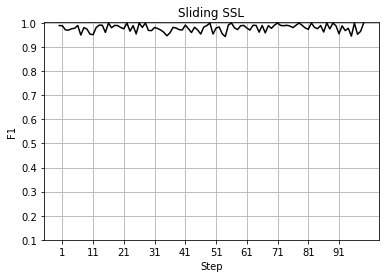

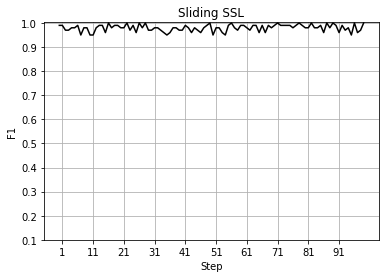




METHOD: Incremental lp as classifier
Execution time:  102.0815842
Average error: 1.8322000000000287
Average macro-F1: 0.9808901986283857
Average micro-F1: 0.9818000000000001
Average Accuracy:  98.16779999999997
Standard Deviation:  0.41108534393724167
Variance:  0.16899116000000028


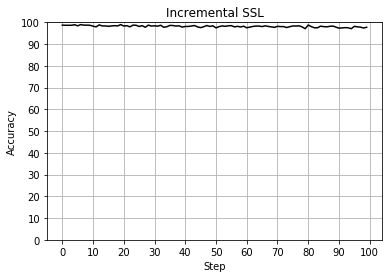

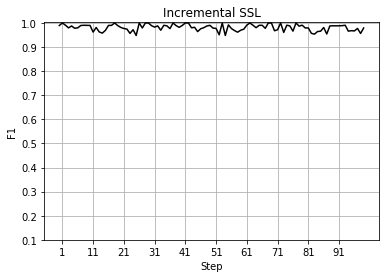

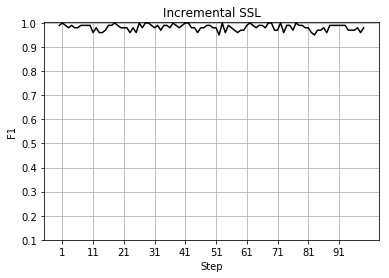




METHOD: lp as classifier and kde as core support extraction with cutting data method
Execution time:  25.059960800000013
Average error: 1.7227000000000032
Average macro-F1: 0.9806479596362387
Average micro-F1: 0.9810999999999999
Average Accuracy:  98.2773
Standard Deviation:  0.43240919277924694
Variance:  0.18697770999999994


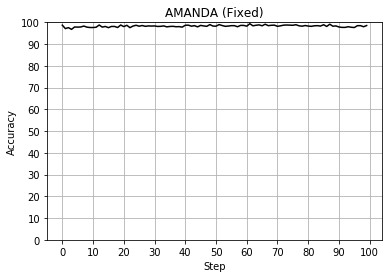

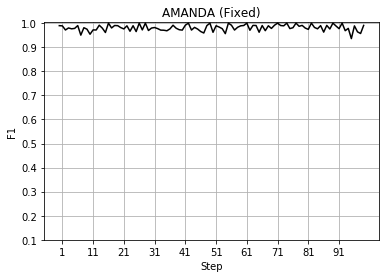

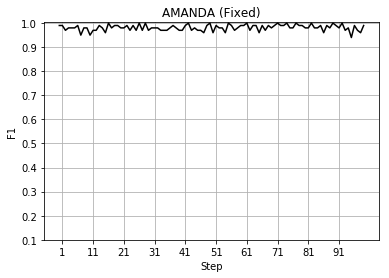




METHOD: lp as classifier and kde and Hellinger distance as dynamic CSE
AMANDA-DCP Hellinger | Mean keeping percentage=0.31 | Std keeping percentage=0.19
Execution time:  25.059734099999986
Average error: 1.889599999999973
Average macro-F1: 0.9799164539092482
Average micro-F1: 0.9802999999999998
Average Accuracy:  98.11040000000003
Standard Deviation:  0.43171036587045286
Variance:  0.18637384000000026


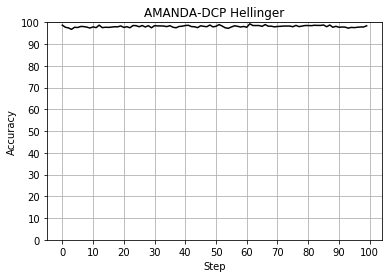

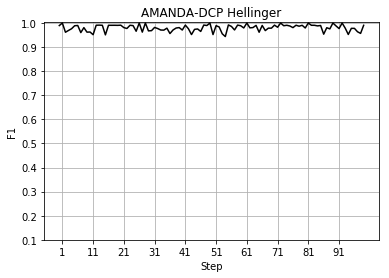

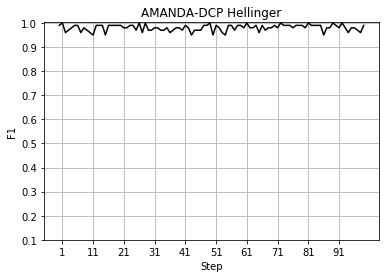




METHOD: lp as classifier and kde and Hellinger2 distance as dynamic CSE
AMANDA-DCP Hellinger2 | Mean keeping percentage=0.15 | Std keeping percentage=0.05
Execution time:  24.38188729999999
Average error: 4.127800000000008
Average macro-F1: 0.9567953880240558
Average micro-F1: 0.9582999999999998
Average Accuracy:  95.87219999999999
Standard Deviation:  1.2660367925143412
Variance:  1.602849160000001


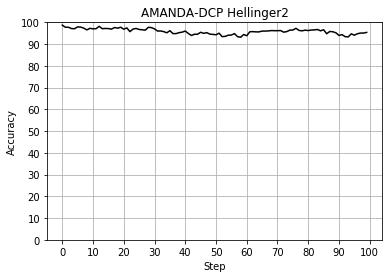

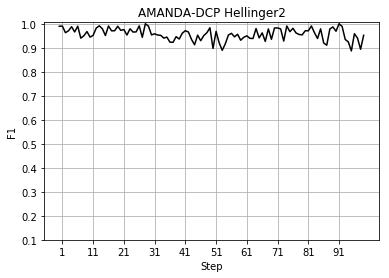

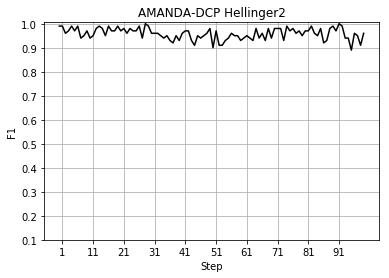




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -10.000 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  23.98605839999999
Average error: 5.906499999999994
Average macro-F1: 0.9385641175468221
Average micro-F1: 0.941
Average Accuracy:  94.0935
Standard Deviation:  1.8421657770135664
Variance:  3.393574749999997


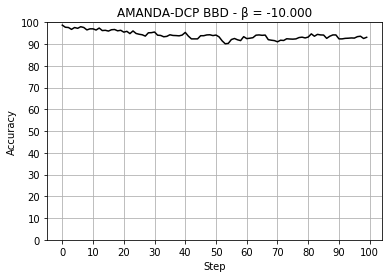

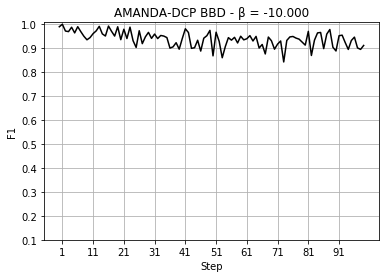

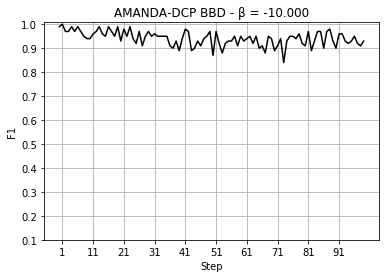




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -2.000 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  24.517146499999996
Average error: 5.897800000000004
Average macro-F1: 0.9388332173746625
Average micro-F1: 0.9412
Average Accuracy:  94.1022
Standard Deviation:  1.837672212338206
Variance:  3.3770391599999967


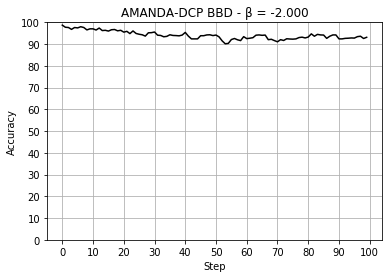

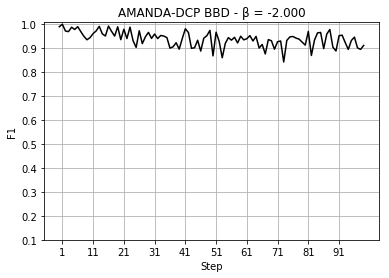

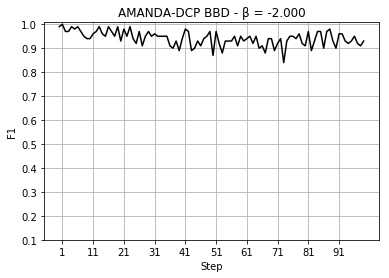




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -0.500 | Mean keeping percentage=0.11 | Std keeping percentage=0.01
Execution time:  25.789046799999994
Average error: 4.357399999999998
Average macro-F1: 0.9553273574440274
Average micro-F1: 0.9560000000000001
Average Accuracy:  95.6426
Standard Deviation:  1.6520239828767624
Variance:  2.7291832400000016


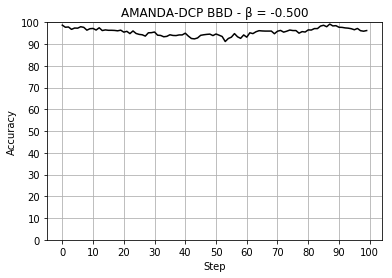

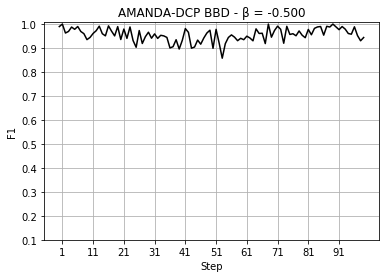

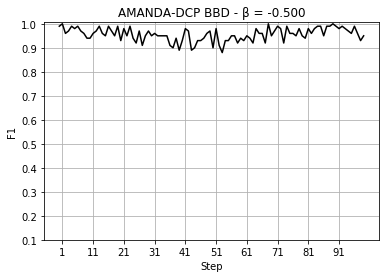




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = -0.010 | Mean keeping percentage=0.22 | Std keeping percentage=0.08
Execution time:  23.93304039999998
Average error: 1.8277000000000072
Average macro-F1: 0.9811115483802239
Average micro-F1: 0.9814999999999999
Average Accuracy:  98.17229999999999
Standard Deviation:  0.4464322008995322
Variance:  0.1993017100000003


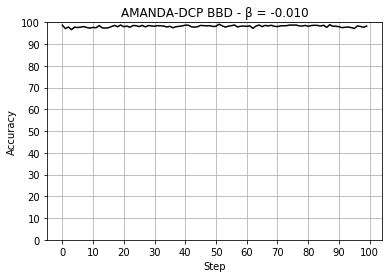

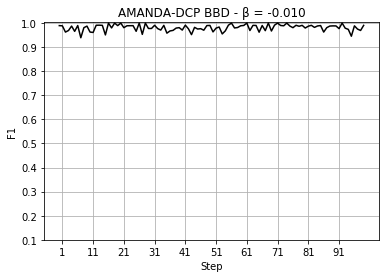

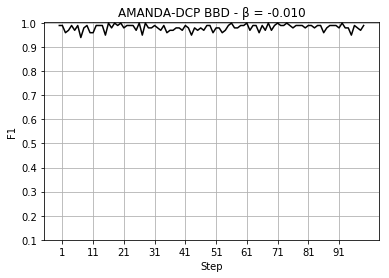




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 1.010 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  24.3841721
Average error: 5.906499999999994
Average macro-F1: 0.9385641175468221
Average micro-F1: 0.941
Average Accuracy:  94.0935
Standard Deviation:  1.8421657770135664
Variance:  3.393574749999997


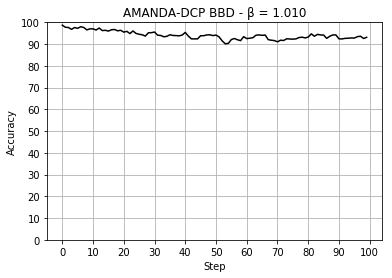

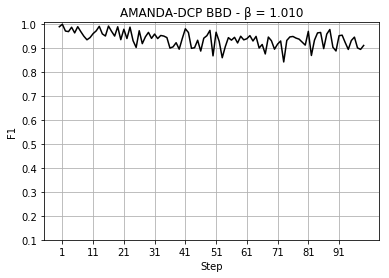

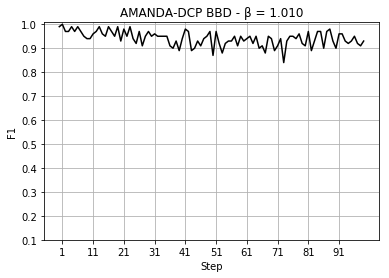




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 1.500 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  23.45494500000001
Average error: 5.906499999999994
Average macro-F1: 0.9385641175468221
Average micro-F1: 0.941
Average Accuracy:  94.0935
Standard Deviation:  1.8421657770135664
Variance:  3.393574749999997


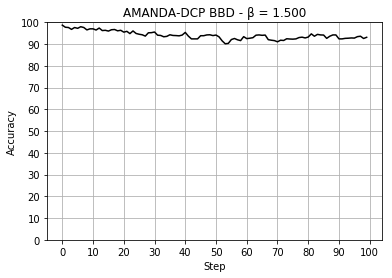

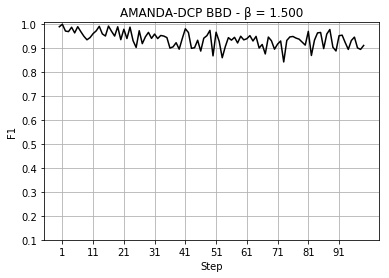

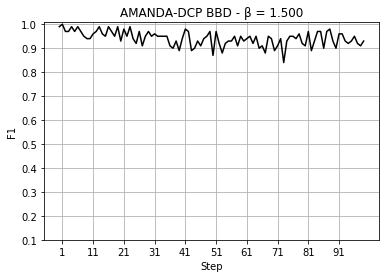




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 2.000 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  24.39621029999995
Average error: 5.906499999999994
Average macro-F1: 0.9385641175468221
Average micro-F1: 0.941
Average Accuracy:  94.0935
Standard Deviation:  1.8421657770135664
Variance:  3.393574749999997


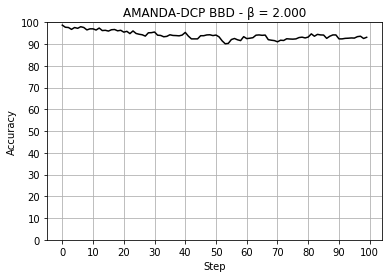

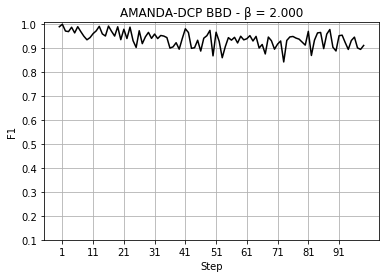

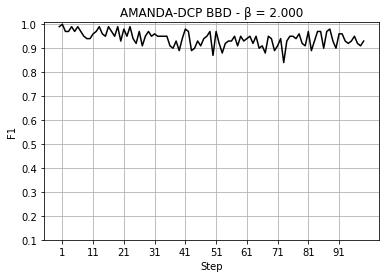




METHOD: lp as classifier and kde and BBD distance as dynamic CSE
AMANDA-DCP BBD - β = 10.000 | Mean keeping percentage=0.10 | Std keeping percentage=0.00
Execution time:  24.411613899999963
Average error: 5.906499999999994
Average macro-F1: 0.9385641175468221
Average micro-F1: 0.941
Average Accuracy:  94.0935
Standard Deviation:  1.8421657770135664
Variance:  3.393574749999997


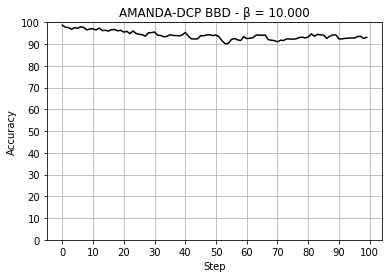

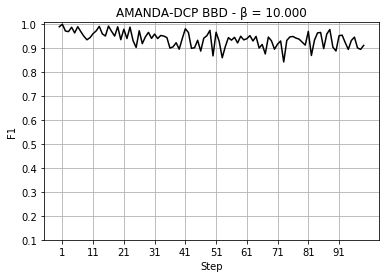

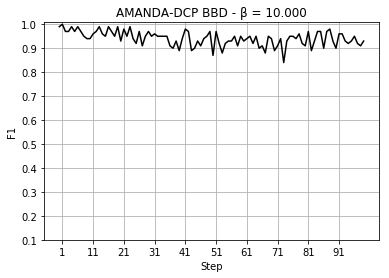




METHOD: lp as classifier and kde and HDDDM distance as dynamic CSE
AMANDA-DCP HDDDM | Mean keeping percentage=0.49 | Std keeping percentage=0.07
Execution time:  25.251824599999964
Average error: 2.352599999999981
Average macro-F1: 0.9749862747704302
Average micro-F1: 0.9754999999999999
Average Accuracy:  97.64740000000002
Standard Deviation:  0.6196960868038457
Variance:  0.38402323999999943


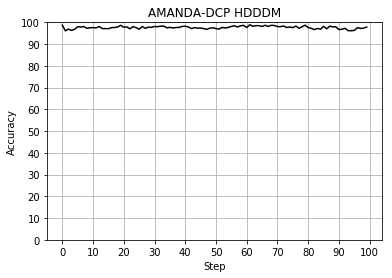

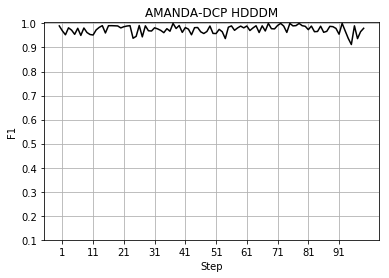

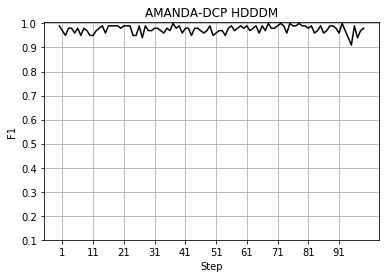

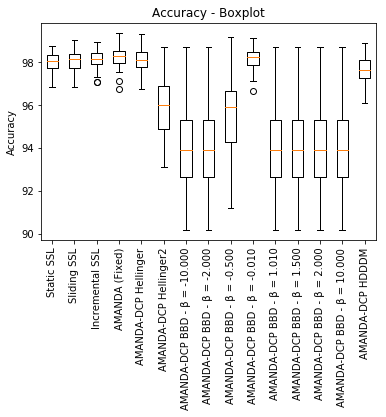

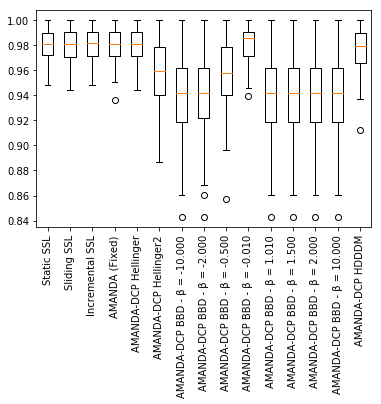

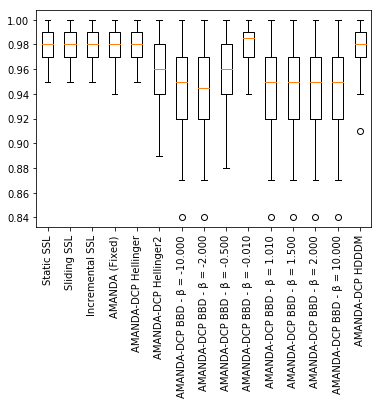

C:\Users\BRUNO\Anaconda3\envs\datascience36\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


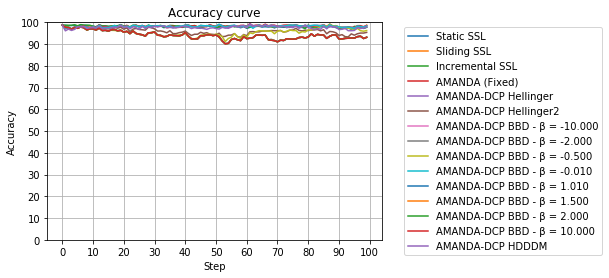

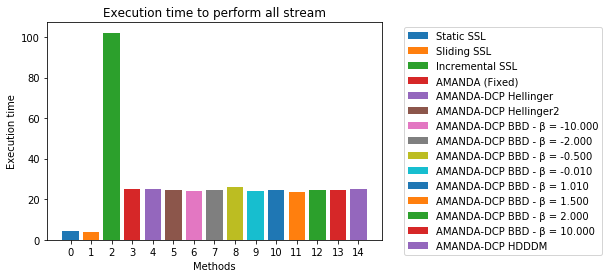

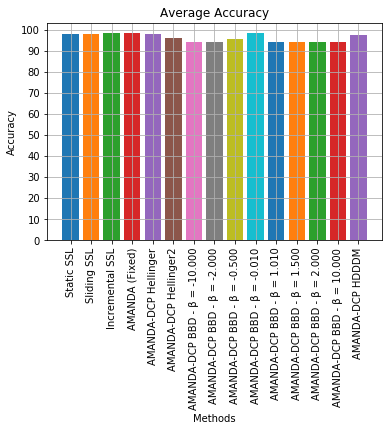

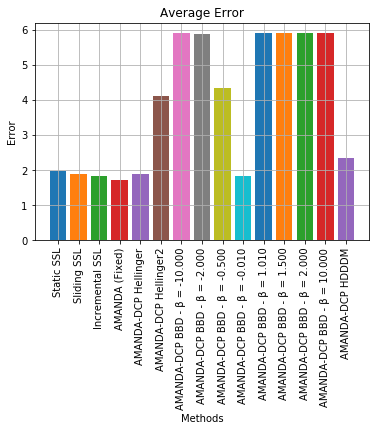

[6, 5, 3, 1, 4, 8, 11, 10, 9, 2, 11, 11, 11, 11, 7]
Pos 5 - Error reduction (Sliding SSL):0.08681635942581703
Pos 3 - Error reduction (Incremental SSL):0.14772043295957168
Pos 1 - Error reduction (AMANDA (Fixed)):0.2594289095416243
Pos 4 - Error reduction (AMANDA-DCP Hellinger):0.08916274751845646
Pos 8 - Error reduction (AMANDA-DCP Hellinger2):-2.1941789171929216
Pos 11 - Error reduction (AMANDA-DCP BBD - β = -10.000):-4.0087530477541025
Pos 10 - Error reduction (AMANDA-DCP BBD - β = -2.000):-3.9998775797517045
Pos 9 - Error reduction (AMANDA-DCP BBD - β = -0.500):-2.4284096589576
Pos 2 - Error reduction (AMANDA-DCP BBD - β = -0.010):0.15231119227118373
Pos 11 - Error reduction (AMANDA-DCP BBD - β = 1.010):-4.0087530477541025
Pos 11 - Error reduction (AMANDA-DCP BBD - β = 1.500):-4.0087530477541025
Pos 11 - Error reduction (AMANDA-DCP BBD - β = 2.000):-4.0087530477541025
Pos 11 - Error reduction (AMANDA-DCP BBD - β = 10.000):-4.0087530477541025
Pos 7 - Error reduction (AMANDA-DCP HDDD

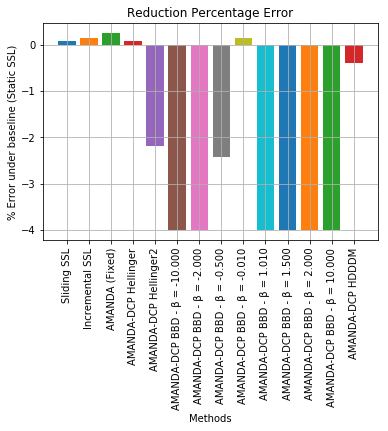

In [1]:
%matplotlib inline
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None, distanceMetric=None, beta=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K
        self.distanceMetric = distanceMetric
        self.beta = beta


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'lp' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = False
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.load4CE1CF(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 5, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 5, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 5, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 5, 0.8, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - DCP ORIGINAL)
    experiments[4] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'Hellinger')
    
    # Proposed method 3 (AMANDA - DCP Hellinger2)
    experiments[5] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'Hellinger2')                         
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[6] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'BBD', beta=-10)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[7] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'BBD', beta=-2)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[8] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'BBD', beta=-0.5)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[9] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'BBD', beta=-0.01)  
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[10] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'BBD', beta=1.01)        
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[11] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'BBD', beta=1.5)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[12] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'BBD', beta=2)
    
    # Proposed method 4 (AMANDA - DCP BBD)
    experiments[13] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'BBD', beta=10)
    
    # Proposed method 4 (AMANDA - DCP HDDDM)
    experiments[14] = Experiment(amanda_dynamic, 5, None, "kde", sslClassifier, 'HDDDM')

    # COMPOSE GMM (Python version)
    #experiments[5] = Experiment(compose_gmm_version, 5)
    
    # levelIw matlab results
    #predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, '4CE1CF', steps)
    #externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()